## Evaluation of classified contacts between rods and bipolar cells
This notebook contains the code to reproduce all plots in figure 6 showing statistics about the rod-BC contacts

In [1]:
import numpy as np
import scipy.linalg
from scipy.stats import itemfreq
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
from sklearn import cross_validation
from sklearn import svm
%matplotlib inline
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
matplotlib.rcParams.update({'mathtext.default': 'regular'})
matplotlib.rcParams.update({'font.size': 14})
sns.set_style("whitegrid")

In [2]:
BC_ids=np.loadtxt('data/BC_IDs_new')

In [3]:
BC_in_rod_area=np.loadtxt('data/BC_in_rod_area')

In [4]:
BC_excluded=np.array([691,709,827,836])
rod_excluded=np.array([3309])

In [5]:
contact_summary=pd.read_pickle('data/rod_contact_predictions')

In [6]:
true_contacts=contact_summary.ix[(contact_summary['prediction']==1)]
true_contacts=true_contacts[np.in1d(true_contacts['cell'],BC_in_rod_area)].reset_index().drop('index',axis=1)

In [7]:
stat_bc_contacts=pd.DataFrame(BC_ids[(((BC_ids[:,4]>=58)&(BC_ids[:,4]<=62))|(BC_ids[:,4]==71))\
                                       &np.in1d(BC_ids[:,0],BC_excluded,invert=True)][:,[0,4]],columns=['cell','type'])
contact_freq_type=itemfreq(true_contacts['cell'].as_matrix())
for i in range(stat_bc_contacts.shape[0]):
    stat_bc_contacts.loc[i,'count']=0
    try:
        stat_bc_contacts.ix[i,'count']=contact_freq_type[contact_freq_type[:,0]==stat_bc_contacts.ix[i,'cell'],1]
    except ValueError:
        continue
stat_bc_contacts=stat_bc_contacts[np.in1d(stat_bc_contacts['cell'],BC_in_rod_area)]

In [8]:
rod_ids=np.unique(contact_summary['rod'].as_matrix())

In [9]:
stat_rod_contacts=pd.DataFrame(np.concatenate((np.tile(rod_ids,14).reshape(-1,1),np.repeat(np.arange(58,72),rod_ids.shape[0]).reshape(-1,1)),axis=1),columns=['rod','type'])

for i in range(stat_rod_contacts.shape[0]):
    stat_rod_contacts.loc[i,'count']=np.sum((true_contacts['rod']==stat_rod_contacts.ix[i,'rod'])&\
                                                   (true_contacts['type']==stat_rod_contacts.ix[i,'type']))
stat_rod_contacts=stat_rod_contacts[np.in1d(stat_rod_contacts['type'],np.array([58,59,60,61,62,71]))]

In [10]:
rod_ids_off=np.unique(true_contacts['rod'])

In [11]:
stat_rod_contacts_off=pd.DataFrame(rod_ids_off,columns=['rod'])

for i in range(stat_rod_contacts_off.shape[0]):
    stat_rod_contacts_off.loc[i,'count']=np.sum((true_contacts['rod']==stat_rod_contacts.ix[i,'rod'])&\
                                                   (true_contacts['type']<71))

#### Number of contacted rods per bipolar cell, averaged over BC type (Figure 6D)

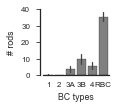

In [12]:
labels = ['1','2','3A','3B','4','RBC']
plt.figure(figsize=(3/2.54,3/2.54))
sns.set(font='Arial',style='white',context='paper',rc={"xtick.major.size": 0, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    ax=sns.barplot(x='type',y='count',data=stat_bc_contacts,order=[58,59,60,61,62,71],ci=95,color='grey')
    ax.set_xticklabels(labels)
    ax.set(ylabel='# rods',ylim=(0,40),xlabel='BC types',yticks=[0,10,20,30,40])
    ax.spines['left'].set_position(('outward',3))
    sns.despine()
#     plt.savefig('figures/rod_contacts_per_bc.svg',bbox_inches='tight',dpi=300)
    plt.show()

#### Numer of contacted rod bipolar cells per rod (Figure 6E)

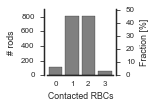

In [13]:
plt.figure(figsize=(3/2.54,3/2.54))
sns.set(font='Arial',style='white',context='paper',rc={"xtick.major.size": 0, "ytick.major.size": 4})
ax=sns.countplot(x='count',data=stat_rod_contacts[stat_rod_contacts['type']==71],order=np.arange(0,4),color='grey')
ncount=len(stat_rod_contacts[stat_rod_contacts['type']==71]['rod'])
ax.set(xlabel='Contacted RBCs',ylabel='# rods',yticks=[0,200,400,600,800])
ax2=ax.twinx()
ax2.set(ylim=([0,ax.get_ylim()[1]/ncount*100]),yticks=[0,10,20,30,40,50],yticklabels=['0','10','20','30','40','50'],ylabel='Fraction [%]')
ax.spines['left'].set_position(('outward',3))
ax.spines['right'].set_position(('outward',3))
ax2.spines['left'].set_position(('outward',3))
ax2.spines['right'].set_position(('outward',3))
sns.despine(right=False)
# plt.savefig('figures/rbc_contacts_per_rod.svg',bbox_inches='tight',dpi=300)
plt.show()

#### Numer of contacted OFF cone bipolar cells per rod (Figure 6F)

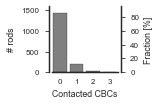

In [14]:
plt.figure(figsize=(3/2.54,3/2.54))
sns.set(font='Arial',style='white',context='paper',rc={"xtick.major.size": 0, "ytick.major.size": 4})
ax=sns.countplot(x='count',data=stat_rod_contacts_off,order=np.arange(0,4),color='grey')
ncount=len(stat_rod_contacts_off['rod'])
ax.set(xlabel='Contacted CBCs',ylabel='# rods',yticks=[0,500,1000,1500])
ax2=ax.twinx()
ax2.set(ylim=([0,ax.get_ylim()[1]/ncount*100]),yticks=[0,20,40,60,80,100],yticklabels=['0','20','40','60','80','100'],ylabel='Fraction [%]')
ax.spines['left'].set_position(('outward',3))
ax.spines['right'].set_position(('outward',3))
ax2.spines['left'].set_position(('outward',3))
ax2.spines['right'].set_position(('outward',3))
sns.despine(right=False)
# plt.savefig('figures/cbc_contacts_per_rod.svg',bbox_inches='tight',dpi=300)
plt.show()